# Individuell uppgift – Hälsostudie

## Del 1 – Grundläggande analys och statistik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.health import HealthAnalyser

analyser = HealthAnalyser("data/health_study_dataset.csv", clean=True)

In [ ]:
per_gender = analyser.summery_of_csv_per_gender()
per_gender

In [ ]:
summery = analyser.summery_of_csv()

summery

In [ ]:
smokers = analyser.smoker_per_gender()

smokers

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

# Smoker Per Gender (F = Female) (M = Male)

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Smoker per Gender'}>)

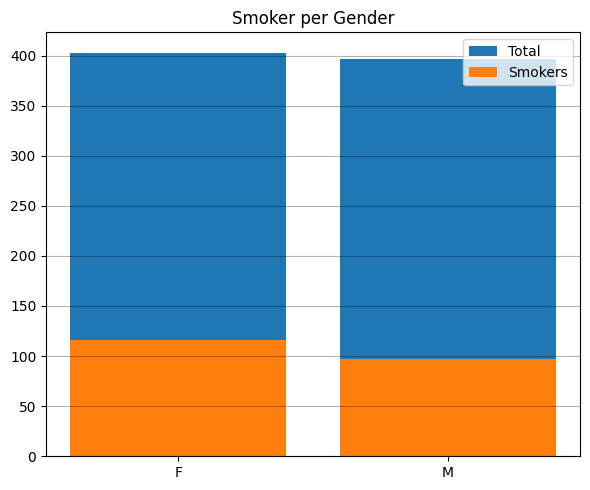

In [2]:
analyser.viz_smoker_per_gender()


# Weight per Gender (F = Female) (M = Male)

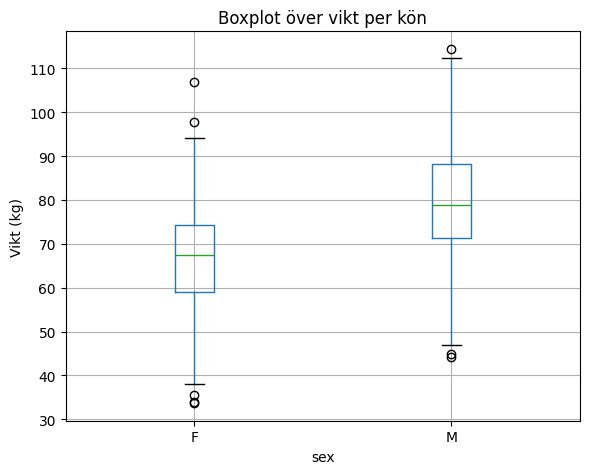

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Boxplot över vikt per kön'}, xlabel='sex', ylabel='Vikt (kg)'>)

In [2]:
analyser.viz_weight_per_gender()

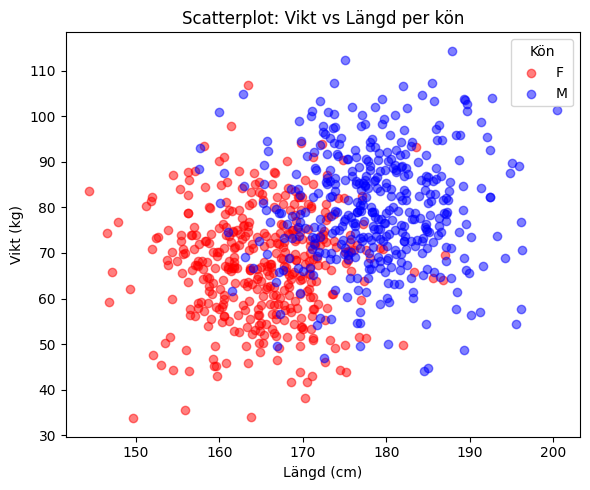

(<Figure size 600x500 with 1 Axes>,
 <Axes: title={'center': 'Scatterplot: Vikt vs Längd per kön'}, xlabel='Längd (cm)', ylabel='Vikt (kg)'>)

In [2]:
analyser.viz_weight_vs_height()